In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
df = pd.read_csv("studentDepressionDataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [11]:
depressed = df[df.Depression==1]
depressed.shape

(16336, 18)

In [12]:
not_depressed = df[df.Depression==0]
not_depressed.shape

(11565, 18)

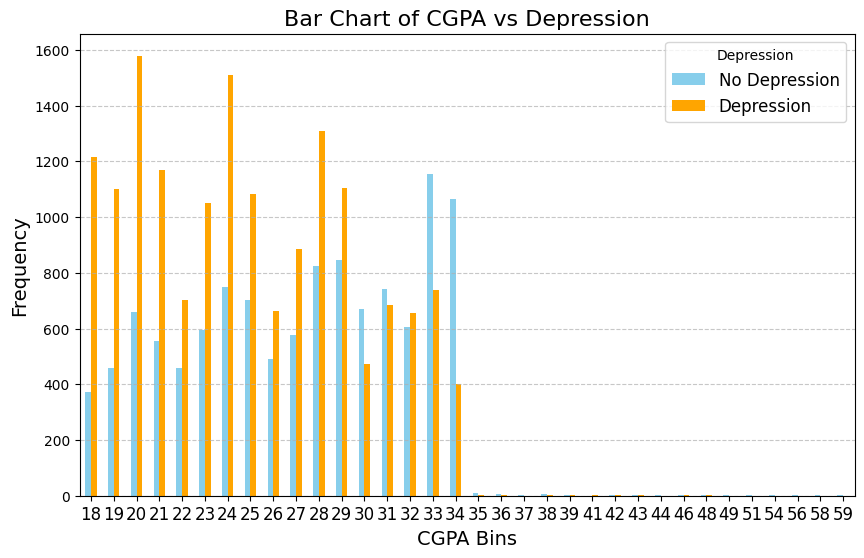

In [17]:
cross_tab = pd.crosstab(df["Age"], df["Depression"])
cross_tab.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange"])

# Adding labels and title
plt.title("Bar Chart of CGPA vs Depression", fontsize=16)
plt.xlabel("CGPA Bins", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(["No Depression", "Depression"], title="Depression", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()

In [54]:
print("Unique values in 'Gender' column before handling NaN:")
print(df["Gender"].unique())

Unique values in 'Gender' column before handling NaN:
[nan]


In [55]:
df["Gender"].fillna("Unknown", inplace=True)

C:\Users\Riya arvadia\AppData\Local\Temp\ipykernel_22352\3520359372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna("Unknown", inplace=True)
C:\Users\Riya arvadia\AppData\Local\Temp\ipykernel_22352\3520359372.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["Gender"].fillna("Unknown", inplace=True)


In [61]:
X = df[["Gender", "Age", "Academic Pressure", "Work Pressure", "CGPA"]]

In [64]:
dummies = pd.get_dummies(X.Gender, prefix="gender", dtype=int)

In [65]:
xwithdummis = pd.concat([X,dummies],axis='columns')
xwithdummis

,Gender,Age,Academic Pressure,Work Pressure,CGPA,gender_Female,gender_Male
0,Male,33,5,0,8.97,0,1
1,Female,24,2,0,5.90,1,0
2,Male,31,3,0,7.03,0,1
3,Female,28,3,0,5.59,1,0
4,Female,25,4,0,8.13,1,0
...,...,...,...,...,...,...,...
27896,Female,27,5,0,5.75,1,0
27897,Male,27,2,0,9.40,0,1
27898,Male,31,3,0,6.61,0,1
27899,Female,18,5,0,6.88,1,0


In [66]:
xwithdummis.drop('Gender',axis='columns',inplace=True)
xwithdummis.head()

,Age,Academic Pressure,Work Pressure,CGPA,gender_Female,gender_Male
0,33,5,0,8.97,0,1
1,24,2,0,5.90,1,0
2,31,3,0,7.03,0,1
3,28,3,0,5.59,1,0
4,25,4,0,8.13,1,0


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xwithdummis, y, test_size=0.3, random_state=42)


In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [72]:
model.fit(X_train,y_train)

LogisticRegression()

In [73]:
y_test

19981    0
16551    0
7640     0
21266    1
15759    1
        ..
18596    1
10606    0
21263    0
8778     1
17657    1
Name: Depression, Length: 8371, dtype: int64

In [75]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1])

In [76]:
model.score(X_test,y_test)

0.7431609126747103

In [77]:
model.predict([[20,6,0,9.99,0,1]])

C:\Users\Riya arvadia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [80]:
model.predict([[20,1,0,7.77,1,0]])

C:\Users\Riya arvadia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])